In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
# import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_directory='D:/fish species/FishImgDataset/train'
test_directory='D:/fish species/FishImgDataset/test'
val_directory='D:/fish species/FishImgDataset/val'
val_directory

'D:/fish species/FishImgDataset/val'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [5]:
# pip install cython

In [6]:
 # useful for getting number of classes
folders = glob('D:/fish species/FishImgDataset/train/*')
len(folders)

31

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set= val_datagen.flow_from_directory(val_directory,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8791 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [11]:
from PIL import Image
FishModel = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20, #20
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

C:\Users\prathap\AppData\Local\Temp\ipykernel_20504\2839487902.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FishModel = model.fit_generator(


Epoch 1/20


275/275 [==============================] - 924s 3s/step - loss: 1.8542 - accuracy: 0.5295 - val_loss: 0.8846 - val_accuracy: 0.7481
Epoch 2/20
275/275 [==============================] - 849s 3s/step - loss: 0.9346 - accuracy: 0.7420 - val_loss: 0.5705 - val_accuracy: 0.8292
Epoch 3/20
275/275 [==============================] - 882s 3s/step - loss: 0.7160 - accuracy: 0.7956 - val_loss: 0.5419 - val_accuracy: 0.8481
Epoch 4/20
275/275 [==============================] - 877s 3s/step - loss: 0.5334 - accuracy: 0.8461 - val_loss: 0.3748 - val_accuracy: 0.8913
Epoch 5/20
275/275 [==============================] - 880s 3s/step - loss: 0.4403 - accuracy: 0.8659 - val_loss: 0.4588 - val_accuracy: 0.8731
Epoch 6/20
275/275 [==============================] - 925s 3s/step - loss: 0.3786 - accuracy: 0.8880 - val_loss: 0.2776 - val_accuracy: 0.9251
Epoch 7/20
275/275 [==============================] - 1098s 4s/step - loss: 0.3289 - accuracy: 0.9018 - val_loss: 0.2480 - val_accuracy: 0.9

In [12]:
pip install pillow

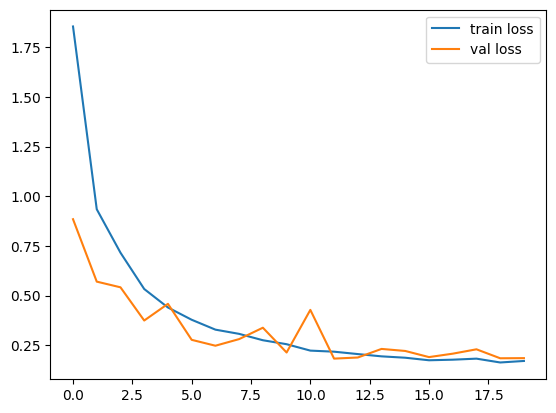

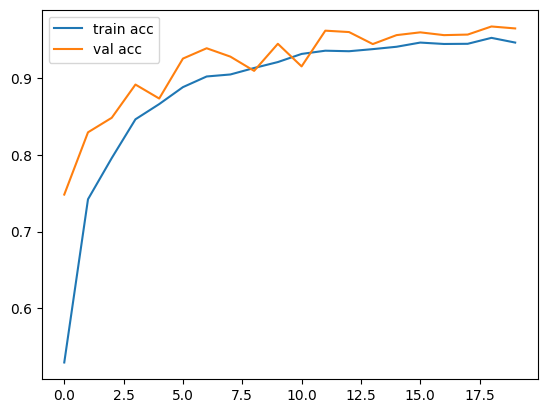

In [16]:
# loss
import matplotlib.pyplot as plt
plt.plot(FishModel.history['loss'], label='train loss')
plt.plot(FishModel.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(FishModel.history['accuracy'], label='train acc')
plt.plot(FishModel.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
model_name = 'FishModelClassifier_VGG161.h5'
model.save(model_name, save_format='h5')
model.save_weights('model_weights_VGG161.h5')

c:\Users\prathap\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
results = model.evaluate(test_set, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.33749
Test Accuracy: 94.32%


In [17]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('FishModelClassifier_VGG161.h5',compile=False) 

In [18]:
class_name=['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin','Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer',
            'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish','Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp',
            'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']

In [23]:
def predict(path):
    img=load_img(path,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    print(answer)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = class_name[y]
    return res

1/1 [==============================] - 1s 784ms/step
[[1.0374685e-18 5.6122173e-21 5.9350956e-24 1.0000000e+00 2.1194991e-13
  9.7438800e-20 1.8051012e-18 2.1734974e-21 1.7869977e-13 3.0563352e-18
  4.5495897e-16 3.9663390e-12 2.0377236e-24 2.1455710e-21 4.0750260e-22
  6.8170118e-17 7.5948382e-17 1.5141388e-18 1.2860370e-20 3.2907767e-16
  6.4972780e-12 6.8386370e-15 4.8739223e-18 2.9783506e-15 2.6152270e-20
  5.4527171e-22 5.0740901e-27 3.5379822e-17 3.0969555e-10 5.2586954e-20
  7.9667447e-14]]


'Catfish'

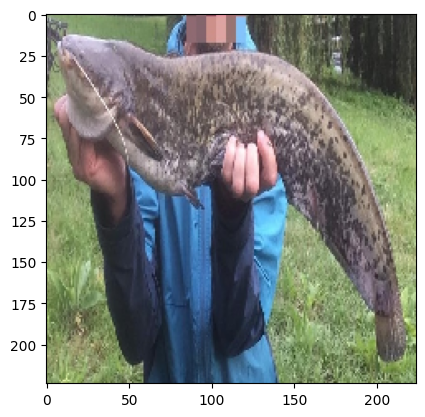

In [24]:
import matplotlib.pyplot as plt
img='D:/fish species/FishImgDataset/test/Catfish/0efe7c4b-76e6-4461-9db8-29fda1c30d3e-710mm.jpg'
pic=load_img(img,target_size=(224,224,3))
plt.imshow(pic)
predict(img)